In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [362]:
names = (['B1', 'B2', 'B3'] + ['C' + str(k) for k in range(1, 140)] + ['YEAR'] +
         ['C140', 'C141', 'C142'] + ['CT' + str(k) for k in range(1, 27)] +
         ['CH' + str(k) for k in range(1, 5)] + ['Class']
        )
feature_names = names[:-1]

In [363]:
dat = pd.read_csv('train.txt',  delimiter='\s+', names=names).dropna()

In [364]:
dat.shape

(6996, 177)

In [365]:
dat.head(5)

,B1,B2,B3,C1,C2,C3,C4,C5,C6,C7,...,CT22,CT23,CT24,CT25,CT26,CH1,CH2,CH3,CH4,Class
0,0,0,1,1.26,1.17,0.720,4.59,0.45,0.765,0.54,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,0.45,0.81,0.000,0.00,0.00,0.855,0.00,...,3.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
2,0,0,1,0.54,2.88,0.000,0.00,0.00,0.765,0.00,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
3,0,0,1,0.81,1.35,0.450,0.00,0.00,0.000,0.72,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0.90,1.17,0.765,0.00,0.00,0.630,0.81,...,4.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0


In [366]:
y = dat['Class']
X = dat.copy().drop(['Class'], axis=1)

In [367]:
from sklearn.decomposition import PCA

In [368]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X.drop(['B1', 'B2', 'B3', 'YEAR'], axis=1))

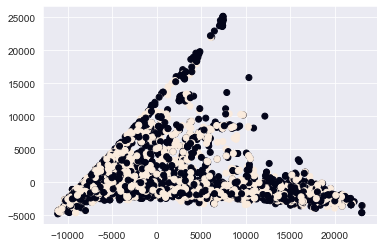

In [369]:
plt.scatter(X_2dim[:, 0], X_2dim[:, 1], c = y)

Project data into 2 principle components, it seems hard to see the correlation with the classes.

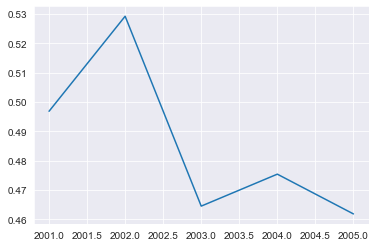

In [30]:
plt.plot(np.arange(2001, 2006),  dat[['YEAR', 'Class']].groupby('YEAR').mean())

See the trend by time.

In [360]:
dat

,B1,B2,B3,C1,C2,C3,C4,C5,C6,C7,...,CT22,CT23,CT24,CT25,CT26,CH1,CH2,CH3,CH4,Class
0,0,0,1,1.260,1.17,0.720,4.59,0.45,0.765,0.54,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,0.450,0.81,0.000,0.00,0.00,0.855,0.00,...,3.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
2,0,0,1,0.540,2.88,0.000,0.00,0.00,0.765,0.00,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
3,0,0,1,0.810,1.35,0.450,0.00,0.00,0.000,0.72,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0.900,1.17,0.765,0.00,0.00,0.630,0.81,...,4.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,1,0,0,0.810,0.99,0.630,0.63,0.00,2.340,1.44,...,6.0,6.0,5.0,4.0,5.0,10.0,0.0,0.0,0.0,0.0
6992,0,0,1,0.810,1.26,0.810,0.54,0.54,2.340,1.44,...,6.0,6.0,5.0,4.0,5.0,12.0,0.0,0.0,0.0,1.0
6993,0,1,0,0.855,1.26,0.720,0.00,0.00,0.810,0.72,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
6994,0,0,1,2.475,2.79,0.000,0.00,0.00,0.810,0.00,...,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0


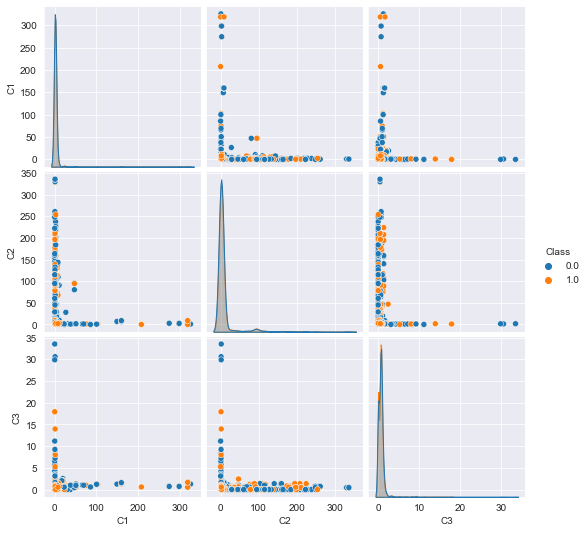

In [372]:
sns.pairplot(dat[['C1', 'C2', 'C3', 'Class']], hue='Class')

## Random forest 

In [388]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import itertools as it

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.1, random_state=1)

In [403]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [404]:
y_pred = rf.predict(X_test)

In [405]:
np.sum(y_pred == y_test) / len(y_test)

0.7385714285714285

In [406]:
rf.score(X_train, y_train) ##over-fitted

0.9996823379923762

Let's do a cross-validation and then grid search to find a set of parameters to avoid overfitting.

In [101]:
n_sample = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
rf = RandomForestClassifier()
cross_val_score(rf, X, y.ravel(), cv=cv)

array([0.74      , 0.70916667, 0.71916667, 0.70166667, 0.7125    ])

In [102]:
kf = KFold(n_splits=5)

params = {
    'n_estimators': [80, 100],
    'max_depth': [10, None]
}

allNames = sorted(params)
combinations = it.product(*(params[Name] for Name in allNames))
combi = list(combinations)
accs = []

for para in combi:
    dict_para = dict(zip(allNames, list(para)))
    dict_acc = dict_para.copy()
    clf = RandomForestClassifier(**dict_para)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)
    mean_score = np.mean(score)
    dict_acc.update({
        'acc': mean_score
    })
    accs.append(dict_acc)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [33]:
accs = pd.DataFrame(accs)

In [34]:
accs

,max_depth,n_estimators,acc
0,10.0,80,0.740529
1,10.0,100,0.738385
2,NaN,80,0.729807
3,NaN,100,0.733381


## Deep neural network

In [327]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import feature_column
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [291]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [391]:
df = pd.read_csv('train.txt',  delimiter='\s+', names=names).dropna()
target_column = ['Class']
predictors = list(set(list(df.columns))-set(target_column))
df.head(5)

,B1,B2,B3,C1,C2,C3,C4,C5,C6,C7,...,CT22,CT23,CT24,CT25,CT26,CH1,CH2,CH3,CH4,Class
0,0,0,1,1.26,1.17,0.720,4.59,0.45,0.765,0.54,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,0.45,0.81,0.000,0.00,0.00,0.855,0.00,...,3.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
2,0,0,1,0.54,2.88,0.000,0.00,0.00,0.765,0.00,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
3,0,0,1,0.81,1.35,0.450,0.00,0.00,0.000,0.72,...,3.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0.90,1.17,0.765,0.00,0.00,0.630,0.81,...,4.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0


In [392]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

print(X_train.shape); print("Prop of 1 in train :{}".format(np.sum(y_train == 1)/len(y_train)))
print(X_val.shape); print("Prop of 1 in val :{}".format(np.sum(y_val == 1)/len(y_val)))
print(X_test.shape); print("Prop of 1 in test :{}".format(np.sum(y_test == 1)/len(y_test)))

(6233, 176)
Prop of 1 in train :0.4801861062088882
(693, 176)
Prop of 1 in val :0.47474747474747475
(70, 176)
Prop of 1 in test :0.44285714285714284


In [379]:
y_train

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [380]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [381]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [382]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=176))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
# opt = keras.optimizers.adam(learning_rate=0.005)
# Compile the model
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [383]:
model.fit(X_train, 
          y_train, 
          batch_size=16,
          validation_data=(X_val, y_val),
          epochs=20)

Train on 6233 samples, validate on 693 samples
Epoch 1/20
6233/6233 [==============================] - 1s 228us/step - loss: 0.6927 - accuracy: 0.5198 - val_loss: 0.6920 - val_accuracy: 0.5253
Epoch 2/20
6233/6233 [==============================] - 2s 242us/step - loss: 0.6925 - accuracy: 0.5198 - val_loss: 0.6919 - val_accuracy: 0.5253
Epoch 3/20
6233/6233 [==============================] - 1s 215us/step - loss: 0.6925 - accuracy: 0.5198 - val_loss: 0.6919 - val_accuracy: 0.5253
Epoch 4/20
6233/6233 [==============================] - 1s 220us/step - loss: 0.6925 - accuracy: 0.5198 - val_loss: 0.6919 - val_accuracy: 0.5253
Epoch 5/20
6233/6233 [==============================] - 1s 224us/step - loss: 0.6925 - accuracy: 0.5198 - val_loss: 0.6919 - val_accuracy: 0.5253
Epoch 6/20
6233/6233 [==============================] - 1s 220us/step - loss: 0.6925 - accuracy: 0.5198 - val_loss: 0.6919 - val_accuracy: 0.5253
Epoch 7/20
6233/6233 [==============================] - 1s 214us/step - loss:

In [310]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.5197670459747314% 
 Error on training data: 0.48023295402526855
Accuracy on test data: 0.5285714268684387% 
 Error on test data: 0.4714285731315613


In [324]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 128)               22656     
_________________________________________________________________
dense_82 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_83 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 34        
Total params: 31,986
Trainable params: 31,986
Non-trainable params: 0
_________________________________________________________________
